In [1]:

import numpy as np
import pandas as pd
from copy import deepcopy
k=3
import random as rd
import matplotlib.pyplot as plt



In [2]:
X=pd.read_csv('/home/ignis/Desktop/kmeans2.csv')
print(X)

    X1   X2
0  4.2  5.4
1  4.5  2.6
2  2.8  2.4
3  1.6  7.6
4  6.4  4.4
5  5.4  3.5
6  3.8  2.7
7  7.4  3.4
8  4.8  2.1
9  9.3  7.4


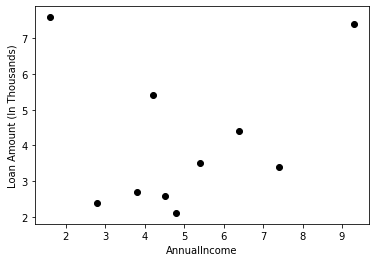

In [3]:


X = X[["X1","X2"]]
#Visualise data points
plt.scatter(X["X1"],X["X2"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()



In [4]:
x1 = X['X1'].values
x2 = X['X2'].values

In [5]:
x1

array([4.2, 4.5, 2.8, 1.6, 6.4, 5.4, 3.8, 7.4, 4.8, 9.3])

In [6]:


x2



array([5.4, 2.6, 2.4, 7.6, 4.4, 3.5, 2.7, 3.4, 2.1, 7.4])

In [7]:
X = np.array(list(zip(x1, x2)))
print(X)

[[4.2 5.4]
 [4.5 2.6]
 [2.8 2.4]
 [1.6 7.6]
 [6.4 4.4]
 [5.4 3.5]
 [3.8 2.7]
 [7.4 3.4]
 [4.8 2.1]
 [9.3 7.4]]


In [8]:
C_x = [4.3, 5.6 ,6]
C_y = [6.3, 3.6, 3]

In [9]:


Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(Centroid.shape)



Initial Centroids
(3, 2)


In [10]:
Centroid

array([[4.3, 6.3],
       [5.6, 3.6],
       [6. , 3. ]], dtype=float32)

In [11]:
type(Centroid)

numpy.ndarray

In [12]:
Centroid_old = np.zeros(Centroid.shape)
print(Centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [13]:
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)


In [15]:
error = euclidean(Centroid, Centroid_old,None)
print(error)

12.144957895720284


In [16]:
iterr = 0

In [17]:
while error != 0:
        # Assigning each value to its closest cluster
        iterr = iterr + 1
        for i in range(len(X)):
            #print("Data Points")
            #print(X[i])
            distances = euclidean(X[i], Centroid)
            #print("Distances")
            #print(distances)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        Centroid_old = deepcopy(Centroid)
        print("Old Centroid")
        print(Centroid_old)
            
        
        # Finding the new centroids by taking the Mean
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            Centroid[p] = np.mean(points, axis=0)
        print(" New Centroids after ", iterr," Iteration \n", Centroid)
        error = euclidean(Centroid, Centroid_old, None)
        print("Error  ... ",error)
        print("Data points belong to which cluster")
        print(clusters)

Old Centroid
[[4.3 6.3]
 [5.6 3.6]
 [6.  3. ]]
 New Centroids after  1  Iteration 
 [[5.0333333 6.8      ]
 [4.58      3.12     ]
 [6.1       2.75     ]]
Error  ...  1.459821
Data points belong to which cluster
[0. 1. 1. 0. 1. 1. 1. 2. 2. 0.]
Old Centroid
[[5.0333333 6.8      ]
 [4.58      3.12     ]
 [6.1       2.75     ]]
 New Centroids after  2  Iteration 
 [[5.0333333 6.8      ]
 [4.26      2.66     ]
 [6.9       3.9      ]]
Error  ...  1.5088075
Data points belong to which cluster
[0. 1. 1. 0. 2. 1. 1. 2. 1. 0.]
Old Centroid
[[5.0333333 6.8      ]
 [4.26      2.66     ]
 [6.9       3.9      ]]
 New Centroids after  3  Iteration 
 [[2.9       6.5      ]
 [4.26      2.66     ]
 [7.7       5.0666666]]
Error  ...  2.5772507
Data points belong to which cluster
[0. 1. 1. 0. 2. 1. 1. 2. 1. 2.]
Old Centroid
[[2.9       6.5      ]
 [4.26      2.66     ]
 [7.7       5.0666666]]
 New Centroids after  4  Iteration 
 [[2.9       6.5      ]
 [4.26      2.66     ]
 [7.7       5.0666666]]
Error  